In [1]:
from datetime import datetime

from clasificacion_humedales.utils.utils_maia import directories, read_image, save_in_file

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import dates

## Datos

In [2]:
PATH_IN, PATH_OUT = directories()
PATH_OUT += 'contributions/'

stack = read_image(PATH_IN + 'stack-ramsar.tif')

amount_of_images = stack.shape[0]
ancho = stack.shape[1]
alto = stack.shape[2]
cant_pixels_total = ancho * alto

stack_imagenes_estiradas = np.reshape(stack, (amount_of_images, cant_pixels_total))
stack_imagenes_estiradas.shape

(416, 189029)

In [3]:
metadata = pd.read_csv(PATH_IN + 'MYD13Q1-006-Statistics.csv')
dates_list = metadata['Date']
dates_list = [datetime.strptime(date, "%Y-%m-%d") for date in dates_list]

In [4]:
mask = stack_imagenes_estiradas[0]!=-3000
mask.sum()

45260

In [5]:
stack_mask = []
for i in range(len(stack_imagenes_estiradas)):
    stack_mask.append(stack_imagenes_estiradas[i][mask])
stack_mask = np.array(stack_mask).T

stack_mask.shape

(45260, 416)

In [6]:
assert((stack_mask == -3000).sum() == 0)

## Componentes principales

In [7]:
method = PCA(random_state=1, n_components=8, svd_solver='full')
transformed = method.fit_transform(stack_mask)

In [8]:
method.explained_variance_ratio_

array([0.75305396, 0.04220121, 0.01616697, 0.01491919, 0.01099982,
       0.00793833, 0.00689328, 0.00481175], dtype=float32)

In [9]:
components = pd.DataFrame(method.components_).T

In [10]:
components

,0,1,2,3,4,5,6,7
0,-0.048948,0.027315,-0.066347,0.000196,0.052008,-0.008737,-0.029400,-0.045823
1,-0.045273,0.026201,-0.059888,-0.007341,0.047367,-0.018300,-0.017859,-0.050853
2,-0.042650,0.016385,-0.055375,-0.023833,0.042564,-0.010324,-0.006804,-0.044319
3,-0.045213,0.008580,-0.067907,-0.024492,0.045373,0.000828,0.000669,-0.047673
4,-0.047744,0.007217,-0.058890,-0.024430,0.042023,0.034221,0.010718,-0.053652
...,...,...,...,...,...,...,...,...
411,-0.035903,0.027035,0.040601,-0.026663,-0.061253,0.084070,-0.047601,-0.023652
412,-0.031930,0.011913,0.043106,-0.038019,-0.055525,0.077157,-0.037049,-0.032710
413,-0.025957,0.005701,0.041874,-0.037271,-0.043601,0.071603,-0.034784,-0.036403
414,-0.024649,0.002543,0.036825,-0.036009,-0.040387,0.071106,-0.030326,-0.034653


In [11]:
contributions = 100*((components**2)/((components**2).sum()))

In [12]:
contributions.index = dates_list

In [13]:
contributions

,0,1,2,3,4,5,6,7
2002-07-04,0.239593,0.074610,0.440186,0.000004,0.270484,0.007634,0.086438,0.209974
2002-07-20,0.204960,0.068651,0.358653,0.005389,0.224368,0.033488,0.031895,0.258602
2002-08-05,0.181905,0.026847,0.306643,0.056803,0.181171,0.010659,0.004630,0.196418
2002-08-21,0.204422,0.007362,0.461139,0.059985,0.205870,0.000069,0.000045,0.227274
2002-09-06,0.227948,0.005208,0.346809,0.059681,0.176596,0.117108,0.011487,0.287851
...,...,...,...,...,...,...,...,...
2020-05-16,0.128902,0.073092,0.164846,0.071091,0.375190,0.706769,0.226588,0.055942
2020-06-01,0.101953,0.014191,0.185813,0.144545,0.308305,0.595325,0.137262,0.106993
2020-06-17,0.067376,0.003250,0.175347,0.138913,0.190109,0.512705,0.120993,0.132519
2020-07-03,0.060755,0.000647,0.135607,0.129666,0.163111,0.505603,0.091966,0.120081


In [14]:
def plot_component(df, i, save_plot=False):
    fig, ax = plt.subplots(1, 1, figsize=(15, 7));
    ax.set_xlim(min(dates_list), max(dates_list));
    ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"));
    ax.xaxis.set_major_locator(plt.LinearLocator(numticks=19));
    plt.xticks(rotation = 45);
    plt.ylabel('Contribución')
    plot = sns.lineplot(data=df[i], sort=False, ax=ax)
    if save_plot:
        plot.figure.savefig(PATH_OUT + f'component_{i}', bbox_inches='tight')
    return plot

<AxesSubplot:ylabel='Contribución'>

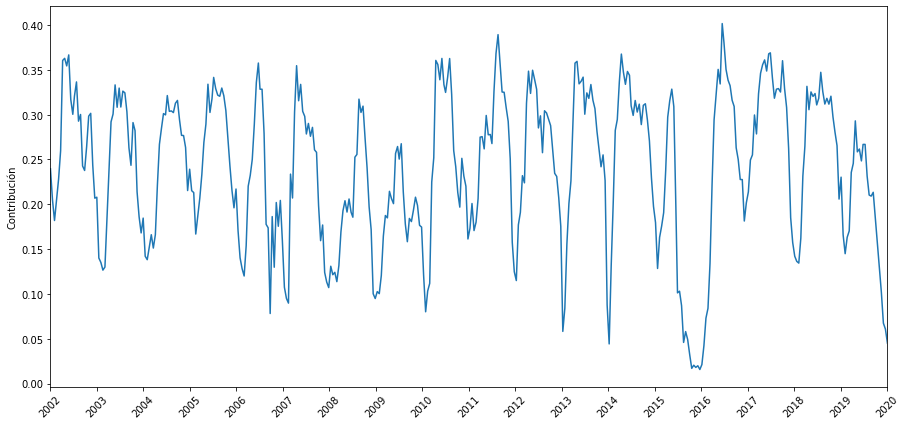

In [15]:
plot_component(contributions, 0)

<AxesSubplot:ylabel='Contribución'>

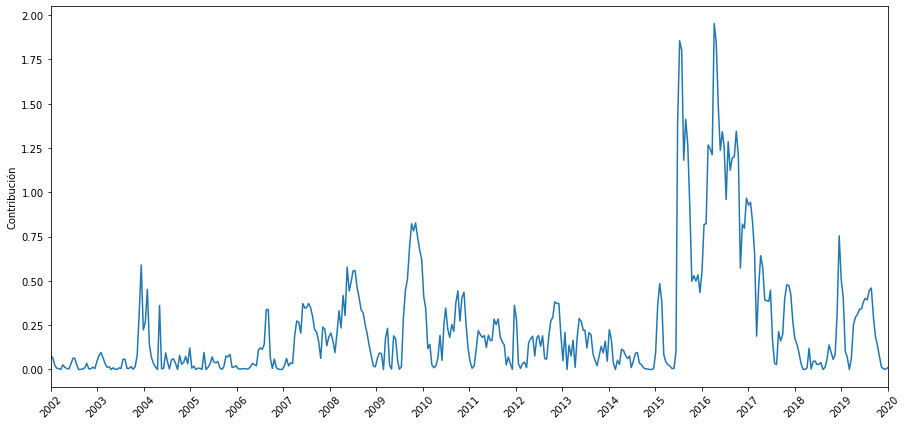

In [16]:
plot_component(contributions, 1)

<AxesSubplot:ylabel='Contribución'>

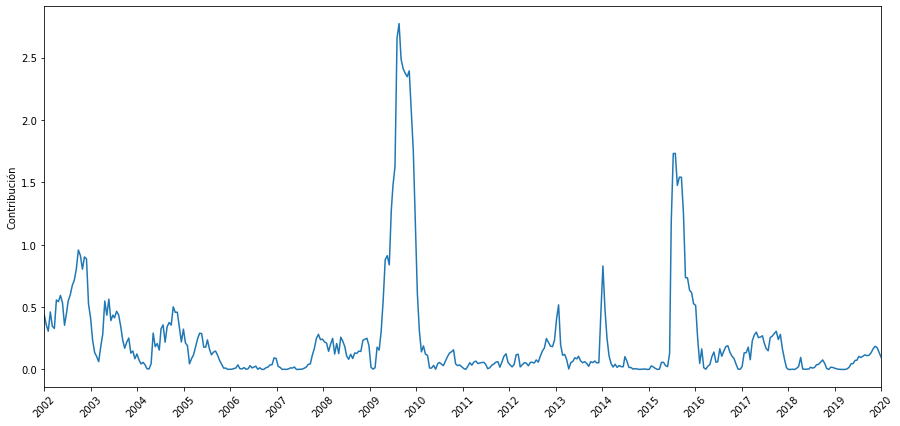

In [17]:
plot_component(contributions, 2)

<AxesSubplot:ylabel='Contribución'>

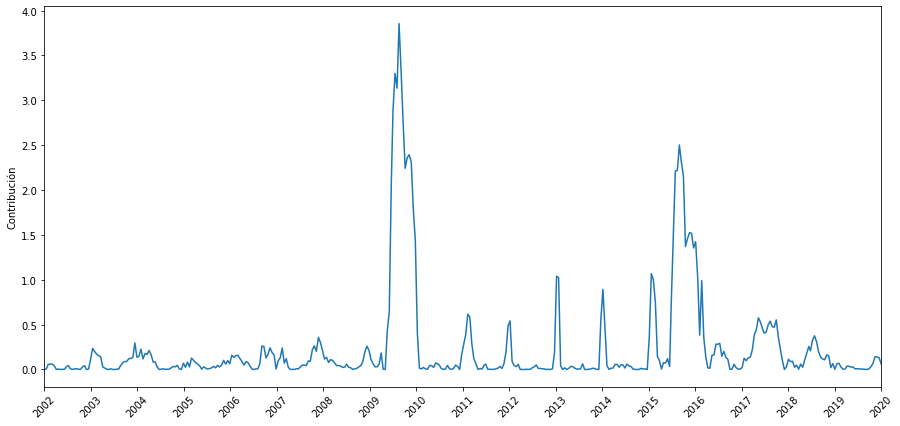

In [18]:
plot_component(contributions, 3)

<AxesSubplot:ylabel='Contribución'>

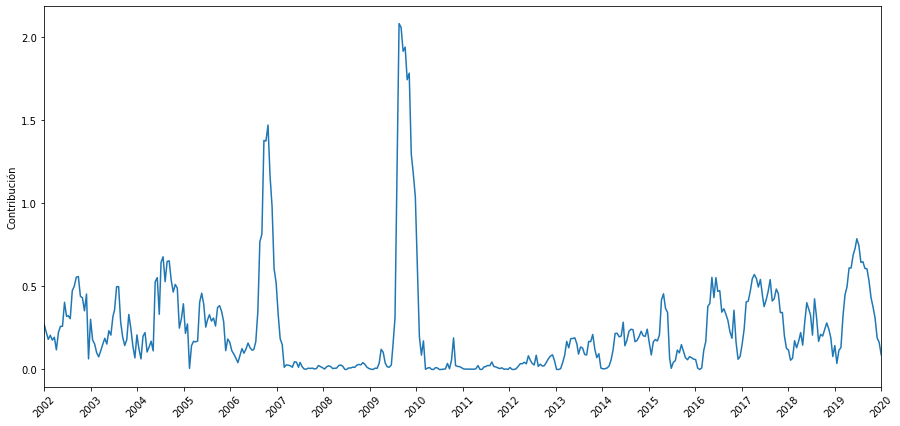

In [19]:
plot_component(contributions, 4)

<AxesSubplot:ylabel='Contribución'>

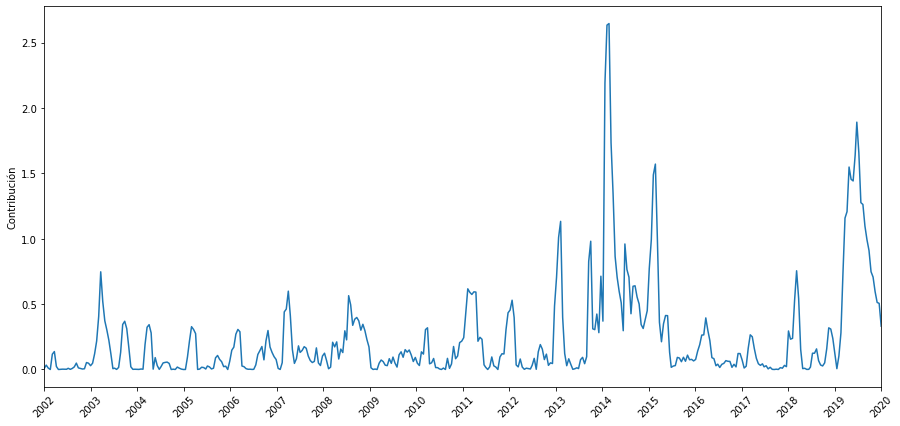

In [20]:
plot_component(contributions, 5)

<AxesSubplot:ylabel='Contribución'>

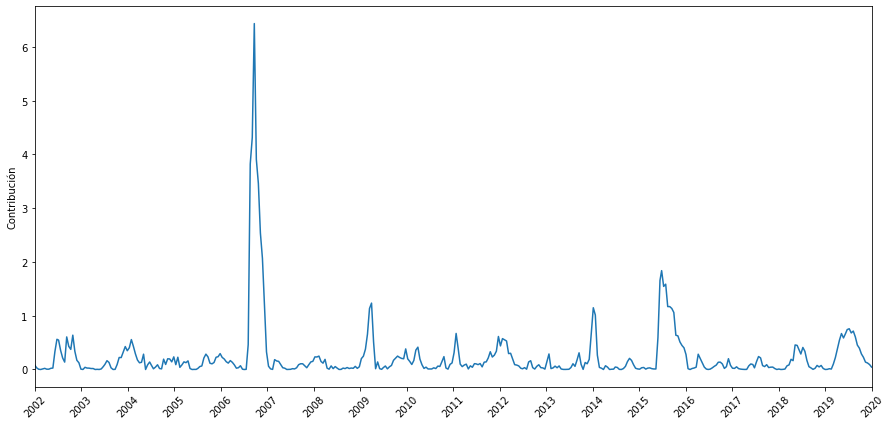

In [21]:
plot_component(contributions, 6)

<AxesSubplot:ylabel='Contribución'>

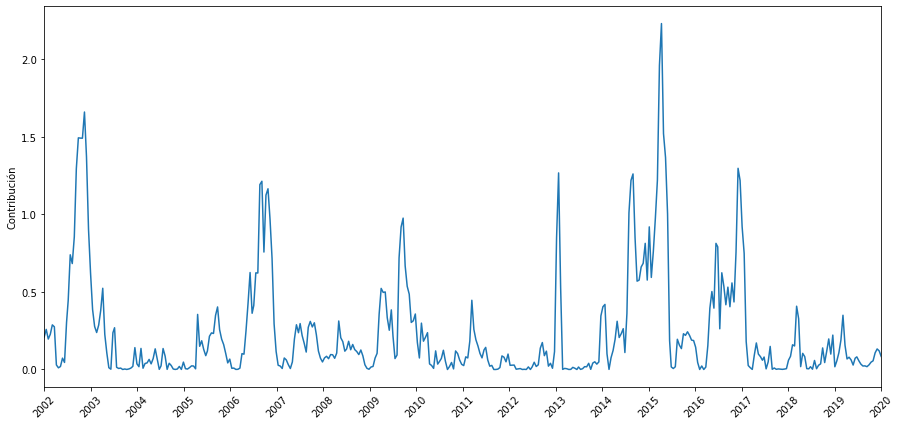

In [22]:
plot_component(contributions, 7)

## Funciones indicadoras

In [23]:
months = [date.month for date in dates_list]

In [24]:
indicadoras = np.array([[1 if month==j else 0 for month in months] for j in range(1, 13)])

In [25]:
indicadoras.shape

(12, 416)

In [26]:
indicadoras = pd.DataFrame(indicadoras.T, index=dates_list)

In [27]:
indicadoras

,0,1,2,3,4,5,6,7,8,9,10,11
2002-07-04,0,0,0,0,0,0,1,0,0,0,0,0
2002-07-20,0,0,0,0,0,0,1,0,0,0,0,0
2002-08-05,0,0,0,0,0,0,0,1,0,0,0,0
2002-08-21,0,0,0,0,0,0,0,1,0,0,0,0
2002-09-06,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-16,0,0,0,0,1,0,0,0,0,0,0,0
2020-06-01,0,0,0,0,0,1,0,0,0,0,0,0
2020-06-17,0,0,0,0,0,1,0,0,0,0,0,0
2020-07-03,0,0,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:ylabel='Contribución'>

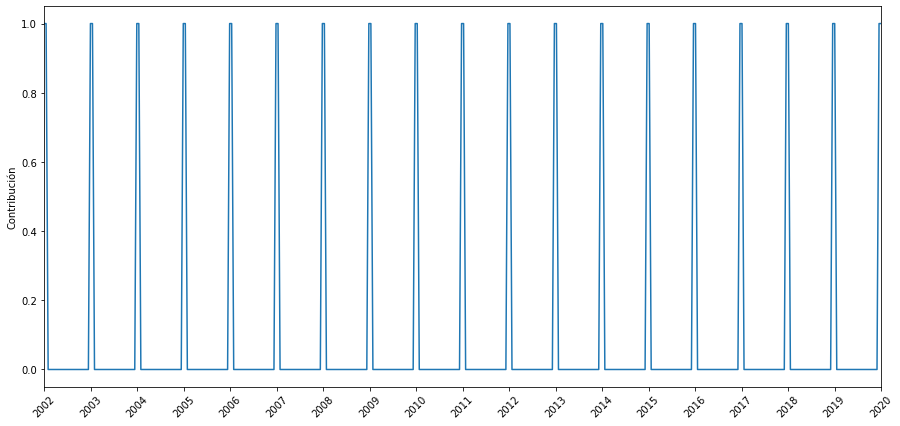

In [28]:
plot_component(indicadoras, 6)